# Linear Regression


## Part 1

In [ ]:
#Importing the required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression, HuberRegressor, PoissonRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00397/LasVegasTripAdvisorReviews-Dataset.csv', sep=';')
df.head(2)

,User country,Nr. reviews,Nr. hotel reviews,Helpful votes,Score,Period of stay,Traveler type,Pool,Gym,Tennis court,Spa,Casino,Free internet,Hotel name,Hotel stars,Nr. rooms,User continent,Member years,Review month,Review weekday
0,USA,11,4,13,5,Dec-Feb,Friends,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,9,January,Thursday
1,USA,119,21,75,3,Dec-Feb,Business,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,3,January,Friday


In [ ]:
df.describe()

,Nr. reviews,Nr. hotel reviews,Helpful votes,Score,Nr. rooms,Member years
count,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000
mean,48.130952,16.023810,31.751984,4.123016,2196.380952,0.767857
std,74.996426,23.957953,48.520783,1.007302,1285.476807,80.692897
min,1.000000,0.000000,0.000000,1.000000,188.000000,-1806.000000
25%,12.000000,5.000000,8.000000,4.000000,826.000000,2.000000
50%,23.500000,9.000000,16.000000,4.000000,2700.000000,4.000000
75%,54.250000,18.000000,35.000000,5.000000,3025.000000,6.000000
max,775.000000,263.000000,365.000000,5.000000,4027.000000,13.000000


In [ ]:
df.dtypes

User country         object
Nr. reviews           int64
Nr. hotel reviews     int64
Helpful votes         int64
Score                 int64
Period of stay       object
Traveler type        object
Pool                 object
Gym                  object
Tennis court         object
Spa                  object
Casino               object
Free internet        object
Hotel name           object
Hotel stars          object
Nr. rooms             int64
User continent       object
Member years          int64
Review month         object
Review weekday       object
dtype: object

In [ ]:
#cleaning data error

df['Hotel stars']=df['Hotel stars'].replace('4,5','4.5')
df['Hotel stars']=df['Hotel stars'].replace('3,5','3.5')

In [ ]:
#fixing data type anomaly
df['Hotel stars'] = df['Hotel stars'].astype('float')
df['Hotel stars'].dtypes

dtype('float64')

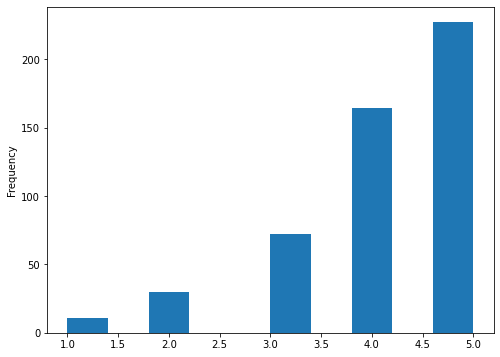

In [ ]:
from IPython.core.pylabtools import figsize
df['Score'].plot(kind='hist',figsize=(8,6))
plt.show()

## Part 2

In [ ]:
onehotencoder=OneHotEncoder()
categorical_features = ['Pool', 'Gym','Tennis court', 'Spa', 'Casino', 'Free internet']
numerical_features = ['Nr. reviews','Nr. hotel reviews','Helpful votes','Hotel stars','Nr. rooms','Member years']
target = 'Score'

#loop to transform encoded values into original dataframe
for i in categorical_features:
  df[i] = onehotencoder.fit_transform(df[[i]]).toarray()
df.head(2)


#onehotencoder.fit(df[['User country','Period of stay','Traveler type','Pool','Gym','Tennis court','Spa','Casino','Free internet','User continent','Review month','Review weekday,']])

,User country,Nr. reviews,Nr. hotel reviews,Helpful votes,Score,Period of stay,Traveler type,Pool,Gym,Tennis court,Spa,Casino,Free internet,Hotel name,Hotel stars,Nr. rooms,User continent,Member years,Review month,Review weekday
0,USA,11,4,13,5,Dec-Feb,Friends,1.0,0.0,1.0,1.0,0.0,0.0,Circus Circus Hotel & Casino Las Vegas,3.0,3773,North America,9,January,Thursday
1,USA,119,21,75,3,Dec-Feb,Business,1.0,0.0,1.0,1.0,0.0,0.0,Circus Circus Hotel & Casino Las Vegas,3.0,3773,North America,3,January,Friday


In [ ]:
#confirming only two unique variables (yes/no, 1/0) for encoded categorical features
for i in df[categorical_features]:
  print(i ,':',len(df[i].unique()))

Pool : 2
Gym : 2
Tennis court : 2
Spa : 2
Casino : 2
Free internet : 2


In [ ]:
df_train, df_test = train_test_split(df, test_size=0.2, stratify=df['Hotel name'])

In [ ]:
df_train.shape, df_test.shape

((403, 20), (101, 20))

In [ ]:
#confirming stratified split by hotel name; about 5 observations per hotel name
df_test['Hotel name'].value_counts().head()

The Westin las Vegas Hotel Casino & Spa    5
Treasure Island- TI Hotel & Casino         5
Marriott's Grand Chateau                   5
Excalibur Hotel & Casino                   5
The Venetian Las Vegas Hotel               5
Name: Hotel name, dtype: int64

In [ ]:
poly = PolynomialFeatures(degree=2)

x_train = poly.fit_transform(df_train[numerical_features])
x_test = poly.transform(df_test[numerical_features])

# x_train_poly = poly.fit_transform(x_train)
# x_test_poly = poly.transform(x_test)

y_train = df_train[target]
y_test = df_test[target]

In [ ]:
y_train.unique()

array([3, 4, 2, 5, 1])

In [ ]:
scaler = MinMaxScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

## Part 3

### Linear Regression

In [ ]:
lr = LinearRegression()
lr.fit(x_train_scaled, y_train)


LinearRegression()

In [ ]:
y_train_predict = lr.predict(x_train_scaled)
y_test_predict = lr.predict(x_test_scaled)


In [ ]:
mean_squared_error(y_test_predict,y_test)

1.1528673770743245

### Huber Regression

In [ ]:
huber = HuberRegressor()

In [ ]:
huber.fit(x_train_scaled, y_train)
y_test_predict_huber=huber.predict(x_test_scaled)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_huber.py:332: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [ ]:
mean_absolute_error(y_test_predict_huber,y_test)

0.7185204744735616

### Poisson regression

In [ ]:
poisson = PoissonRegressor()

In [ ]:
poisson.fit(x_train_scaled, y_train)
y_test_predict_poisson=poisson.predict(x_test_scaled)

In [ ]:
mean_squared_error(y_test_predict_poisson,y_test), mean_absolute_error(y_test_predict_poisson,y_test)

(0.9776812482450192, 0.7518570729972511)

## Part 4

NOTE: Target variable on testing data set already predicted in Part 3

In [ ]:
#loading all predictions from 3 models into a single melted dataframe in order to do boxplot.
#note prediction values are casted as integer

df_predictions = pd.DataFrame([y_test_predict, y_test_predict_huber, y_test_predict_poisson], index=['LR','HR','PR']).pivot_table(columns=['LR','HR','PR']).melt()
df_predictions.head()

,variable,value
0,HR,4.265207
1,HR,3.992865
2,HR,4.344587
3,HR,4.411296
4,HR,4.061178


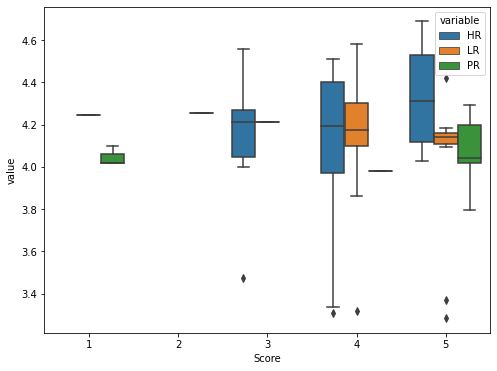

In [ ]:
import seaborn as sns

plt.figure(figsize=(8,6))
sns.boxplot(x=y_test, y='value', hue='variable', data = df_predictions) #predictions left as float values
plt.show()

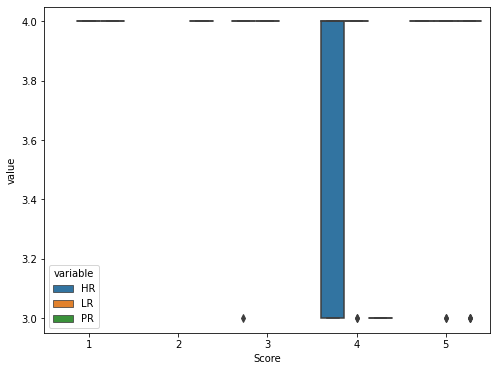

In [ ]:
df_predictions.value = df_predictions.value.astype('int') #predictions changed to integer values

plt.figure(figsize=(8,6))
sns.boxplot(x=y_test, y='value', hue='variable', data = df_predictions) 
plt.show()